# Lab 4 Tasks

In [1]:
import numpy as np
import cv2
from math import sqrt, atan2
from matplotlib import pyplot as plt

In [2]:
# Task A1: Gaussian Smoothing (Center Pixel)
patch = np.array([[10, 20, 30], [20, 30, 40], [30, 40, 50]], dtype=float)
gaussian_kernel = np.array([[0.059, 0.097, 0.059], [0.097, 0.159, 0.097], [0.059, 0.097, 0.059]])
center_smoothed = np.sum(patch * gaussian_kernel)
center_smoothed

np.float64(23.49)

In [29]:
# Task A2: Gaussian Smoothing (Corner Pixel) with replicate padding
patch = np.array([[10, 20, 30], [20, 30, 40], [30, 40, 50]], dtype=float)
gaussian_kernel = np.array([[0.059, 0.097, 0.059], [0.097, 0.159, 0.097], [0.059, 0.097, 0.059]])
padded_patch = np.pad(patch, ((1,0),(1,0)), 'edge')
top_left_patch = padded_patch[0:3,0:3]
top_left_smoothed = np.sum(top_left_patch * gaussian_kernel)
top_left_smoothed

np.float64(12.129999999999999)

In [4]:
# Task A3: Unsharp Masking (Center Pixel)
center_original = patch[1,1]
detail = center_original - center_smoothed
sharpened_1 = center_original + 1.0 * detail
sharpened_15 = center_original + 1.5 * detail
sharpened_1, sharpened_15

(np.float64(36.510000000000005), np.float64(39.765))

In [5]:
# Task A4: Prewitt Gradient (Vertical Edge)
prewitt_patch = np.array([[10,10,200],[10,10,200],[10,10,200]], dtype=float)
Px = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
Py = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
Gx = np.sum(prewitt_patch * Px)
Gy = np.sum(prewitt_patch * Py)
mag = sqrt(Gx**2 + Gy**2)
theta = atan2(Gy, Gx)
Gx, Gy, mag, theta

(np.float64(570.0), np.float64(0.0), 570.0, 0.0)

In [6]:
# Task A5: Sobel Gradient (Horizontal Edge)
sobel_patch = np.array([[10,10,10],[10,10,10],[200,200,200]], dtype=float)
Sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Gx_s = np.sum(sobel_patch * Sx)
Gy_s = np.sum(sobel_patch * Sy)
mag_s = sqrt(Gx_s**2 + Gy_s**2)
theta_s = atan2(Gy_s, Gx_s)
Gx_s, Gy_s, mag_s, theta_s

(np.float64(0.0), np.float64(760.0), 760.0, 1.5707963267948966)

In [7]:
# Task A6: Sobel Gradient (Vertical Edge)
sobel_patch_v = np.array([[10,10,200],[10,10,200],[10,10,200]], dtype=float)
Gx_sv = np.sum(sobel_patch_v * Sx)
Gy_sv = np.sum(sobel_patch_v * Sy)
mag_sv = sqrt(Gx_sv**2 + Gy_sv**2)
theta_sv = atan2(Gy_sv, Gx_sv)
Gx_sv, Gy_sv, mag_sv, theta_sv

(np.float64(760.0), np.float64(0.0), 760.0, 0.0)

In [8]:
# Task A7: Non-Maximum Suppression (1D Concept)
grad_mags = np.array([0, 5, 10, 6, 2])
nms_result = np.zeros_like(grad_mags)
for i in range(1, len(grad_mags)-1):
    if grad_mags[i] > grad_mags[i-1] and grad_mags[i] > grad_mags[i+1]:
        nms_result[i] = grad_mags[i]
nms_result

array([ 0,  0, 10,  0,  0])

In [9]:
# Task A8: Double Thresholding + Hysteresis
magnitudes = np.array([40, 80, 20, 100, 50])
low, high = 30, 70
labels = np.where(magnitudes >= high, 'Strong', np.where(magnitudes >= low, 'Weak', 'Non-edge'))
hysteresis = labels.copy()
for i in range(1, len(labels)-1):
    if labels[i] == 'Weak' and ('Strong' in [labels[i-1], labels[i+1]]):
        hysteresis[i] = 'Strong'
hysteresis

array(['Weak', 'Strong', 'Non-edge', 'Strong', 'Weak'], dtype='<U8')

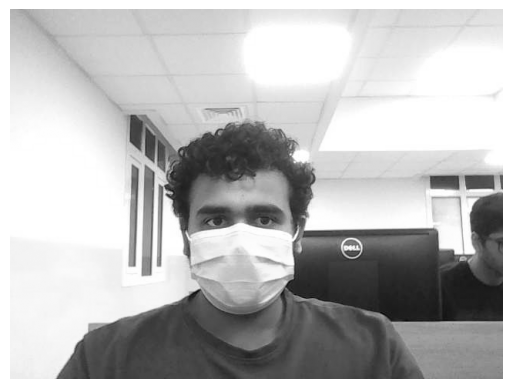

In [10]:
# Task B1: Capture a Frame
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cv2.imwrite('results/webcam_gray.png', gray)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

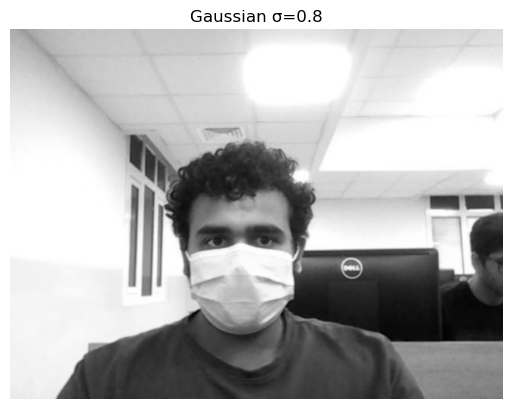

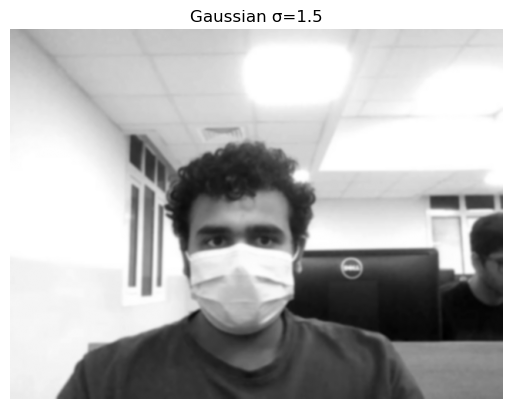

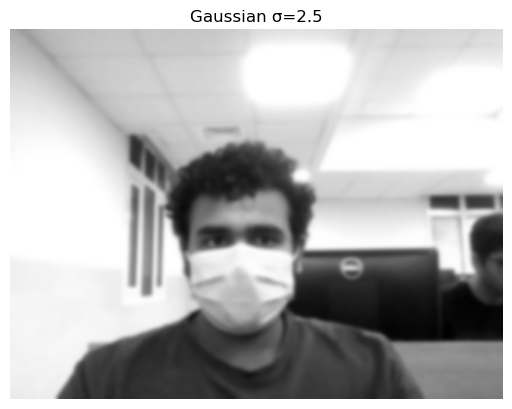

In [11]:
# Task B2: Gaussian Smoothing
sigmas = [0.8, 1.5, 2.5]
for sigma in sigmas:
    blurred = cv2.GaussianBlur(gray, (0,0), sigma)
    cv2.imwrite(f'results/webcam_gauss_{sigma}.png', blurred)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'Gaussian σ={sigma}')
    plt.axis('off')
    plt.show()

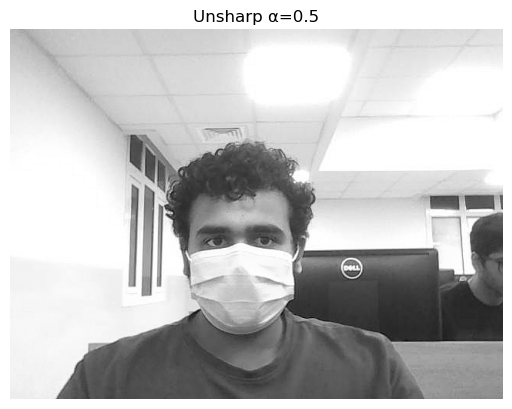

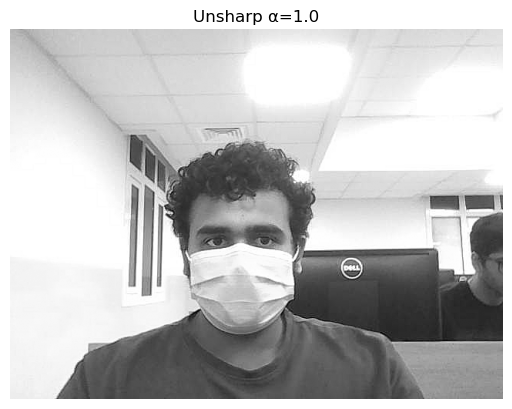

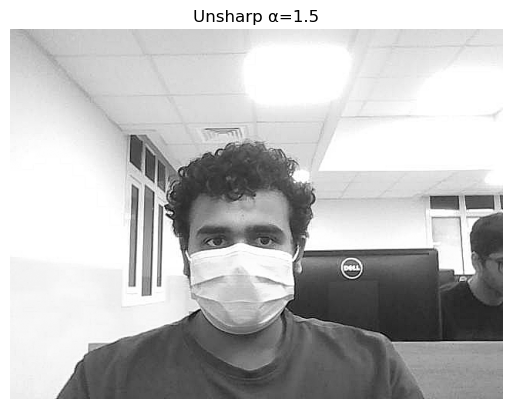

In [13]:
# Task B3: Unsharp Masking
for alpha in [0.5, 1.0, 1.5]:
    blurred = cv2.GaussianBlur(gray, (0,0), 1.0)
    detail = gray.astype(np.float32) - blurred.astype(np.float32)
    sharpened = gray.astype(np.float32) + alpha * detail
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    cv2.imwrite(f'results/webcam_unsharp_{alpha}.png', sharpened)
    plt.imshow(sharpened, cmap='gray')
    plt.title(f'Unsharp α={alpha}')
    plt.axis('off')
    plt.show()

In [22]:
# Task B4: Prewitt Gradients
prewitt_gx = cv2.filter2D(gray, -1, Px)
prewitt_gy = cv2.filter2D(gray, -1, Py)
prewitt_mag = np.sqrt(prewitt_gx**2 + prewitt_gy**2)
prewitt_dir = np.arctan2(prewitt_gy, prewitt_gx)
cv2.imwrite('results/prewitt_gx.png', prewitt_gx)
cv2.imwrite('results/prewitt_gy.png', prewitt_gy)
cv2.imwrite('results/prewitt_mag.png', prewitt_mag)
cv2.imwrite('results/prewitt_dir.png', prewitt_dir)

True

In [23]:
# Task B5: Sobel Gradients
sobel_gx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_gy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = np.sqrt(sobel_gx**2 + sobel_gy**2)
sobel_dir = np.arctan2(sobel_gy, sobel_gx)
cv2.imwrite('results/sobel_gx.png', sobel_gx)
cv2.imwrite('results/sobel_gy.png', sobel_gy)
cv2.imwrite('results/sobel_mag.png', sobel_mag)
cv2.imwrite('results/sobel_dir.png', sobel_dir)

True

In [24]:
# Task B6: Non-Maximum Suppression
nms = np.zeros_like(sobel_mag)
direction = np.round(sobel_dir * (180.0 / np.pi) / 45) * 45
for i in range(1, gray.shape[0]-1):
    for j in range(1, gray.shape[1]-1):
        angle = direction[i, j] % 180
        mag = sobel_mag[i, j]
        if angle == 0:
            if mag >= sobel_mag[i, j-1] and mag >= sobel_mag[i, j+1]:
                nms[i, j] = mag
        elif angle == 45:
            if mag >= sobel_mag[i-1, j+1] and mag >= sobel_mag[i+1, j-1]:
                nms[i, j] = mag
        elif angle == 90:
            if mag >= sobel_mag[i-1, j] and mag >= sobel_mag[i+1, j]:
                nms[i, j] = mag
        elif angle == 135:
            if mag >= sobel_mag[i-1, j-1] and mag >= sobel_mag[i+1, j+1]:
                nms[i, j] = mag
cv2.imwrite('results/nms.png', nms)

True

In [25]:
# Task B7: Double Thresholding
low_thresh = np.percentile(nms, 25)
high_thresh = np.percentile(nms, 75)
double_thresh = np.zeros_like(nms)
double_thresh[nms >= high_thresh] = 255
double_thresh[(nms >= low_thresh) & (nms < high_thresh)] = 128
cv2.imwrite('results/double_threshold.png', double_thresh)

True

In [26]:
# Task B8: Hysteresis
hyst = np.zeros_like(double_thresh)
strong = 255
weak = 128
for i in range(1, hyst.shape[0]-1):
    for j in range(1, hyst.shape[1]-1):
        if double_thresh[i, j] == weak:
            if np.any(double_thresh[i-1:i+2, j-1:j+2] == strong):
                hyst[i, j] = strong
        elif double_thresh[i, j] == strong:
            hyst[i, j] = strong
cv2.imwrite('results/hysteresis.png', hyst)

True

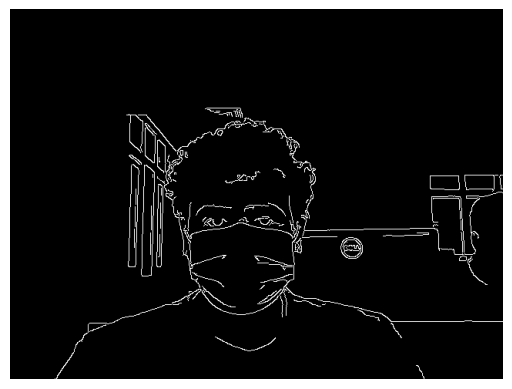

In [19]:
# Task B9: Full Canny (Optional)
canny_lib = cv2.Canny(gray, 100, 200)
cv2.imwrite('results/canny_lib.png', canny_lib)
plt.imshow(canny_lib, cmap='gray')
plt.axis('off')
plt.show()

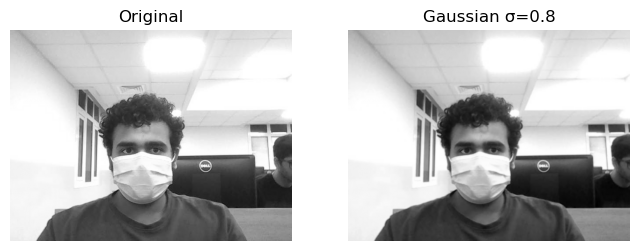

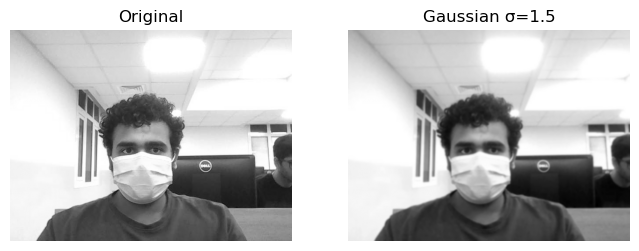

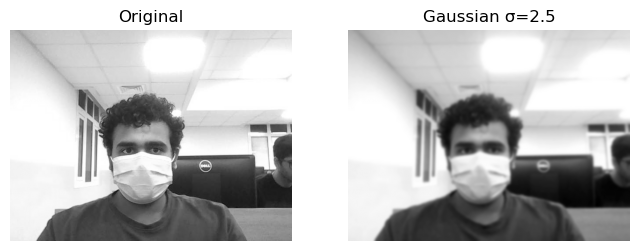

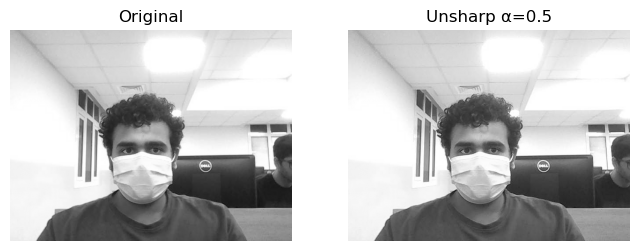

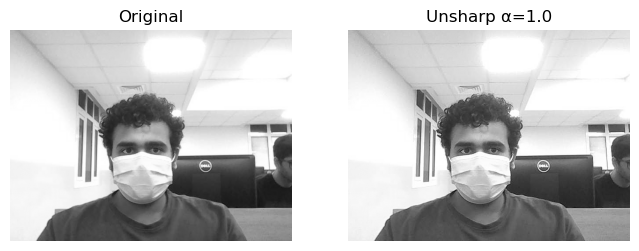

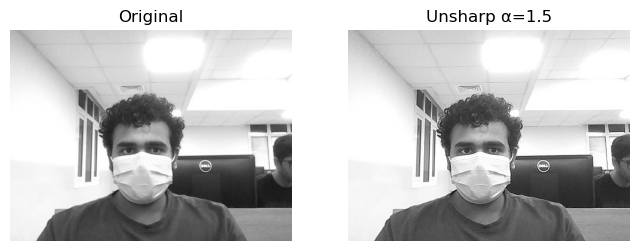

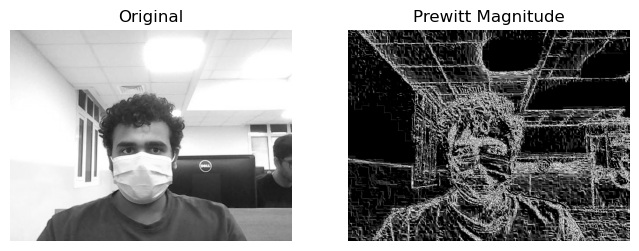

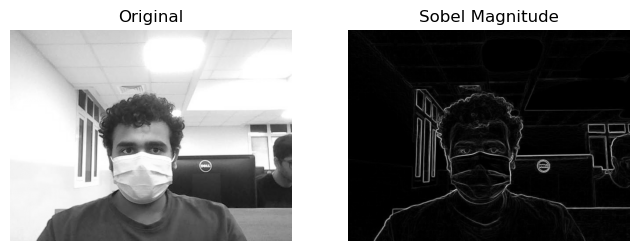

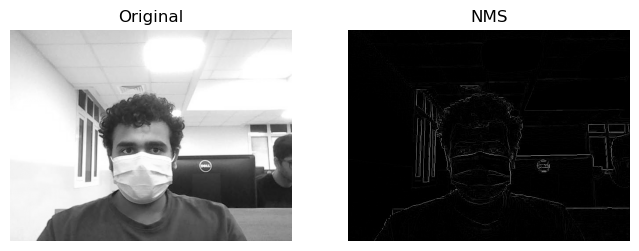

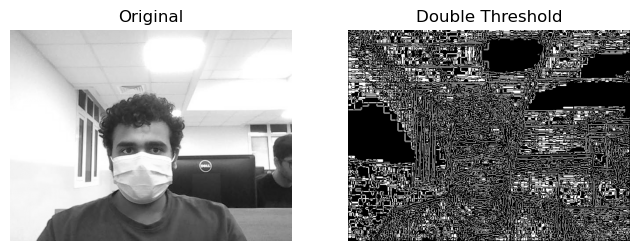

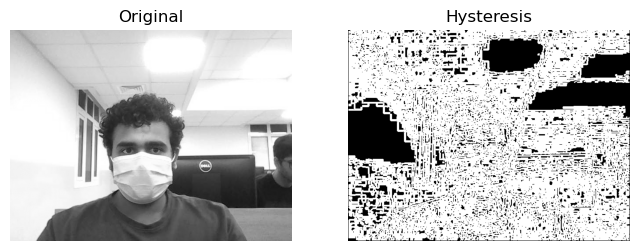

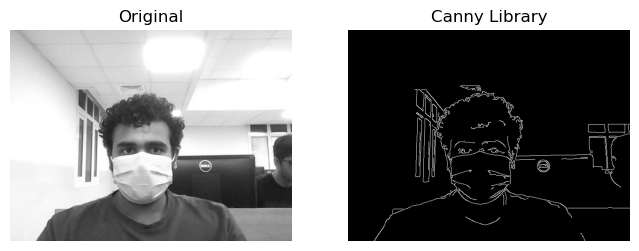

In [21]:
# Compare output images with original for each task
from matplotlib import gridspec

def show_comparison(original, processed, title1='Original', title2='Processed', cmap='gray'):
    plt.figure(figsize=(8,4))
    gs = gridspec.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax1.imshow(original, cmap=cmap)
    ax1.set_title(title1)
    ax1.axis('off')
    ax2.imshow(processed, cmap=cmap)
    ax2.set_title(title2)
    ax2.axis('off')
    plt.show()

# Gaussian Smoothing comparison
for sigma in sigmas:
    blurred = cv2.GaussianBlur(gray, (0,0), sigma)
    show_comparison(gray, blurred, 'Original', f'Gaussian σ={sigma}')

# Unsharp Masking comparison
for alpha in [0.5, 1.0, 1.5]:
    blurred = cv2.GaussianBlur(gray, (0,0), 1.0)
    detail = gray.astype(np.float32) - blurred.astype(np.float32)
    sharpened = gray.astype(np.float32) + alpha * detail
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    show_comparison(gray, sharpened, 'Original', f'Unsharp α={alpha}')

# Prewitt comparison
show_comparison(gray, prewitt_mag, 'Original', 'Prewitt Magnitude')

# Sobel comparison
show_comparison(gray, sobel_mag, 'Original', 'Sobel Magnitude')

# NMS comparison
show_comparison(gray, nms, 'Original', 'NMS')

# Double Thresholding comparison
show_comparison(gray, double_thresh, 'Original', 'Double Threshold')

# Hysteresis comparison
show_comparison(gray, hyst, 'Original', 'Hysteresis')

# Canny library comparison
show_comparison(gray, canny_lib, 'Original', 'Canny Library')